<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/video_notebooks/03_convolutional_neural_networks_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

See full course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
# import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [3]:
# !ls pizza_steak
import os
os.listdir("data/pizza_steak")

['test', 'train']

In [4]:
# !ls pizza_steak/train/
os.listdir("data/pizza_steak/train")

['steak', 'pizza']

In [10]:
# !ls pizza_steak/train/steak
os.listdir("data/pizza_steak/train/steak")

['239025.jpg',
 '1155665.jpg',
 '3007772.jpg',
 '1598345.jpg',
 '658189.jpg',
 '172936.jpg',
 '3807440.jpg',
 '168775.jpg',
 '331860.jpg',
 '2939678.jpg',
 '2173084.jpg',
 '1327667.jpg',
 '468384.jpg',
 '3074367.jpg',
 '1487113.jpg',
 '2568848.jpg',
 '143490.jpg',
 '2233395.jpg',
 '3009617.jpg',
 '2995169.jpg',
 '1567554.jpg',
 '268444.jpg',
 '1403005.jpg',
 '637374.jpg',
 '2390628.jpg',
 '2172600.jpg',
 '2761427.jpg',
 '3621464.jpg',
 '3540750.jpg',
 '134369.jpg',
 '2832499.jpg',
 '3253588.jpg',
 '2291292.jpg',
 '3260624.jpg',
 '2090493.jpg',
 '1219039.jpg',
 '140832.jpg',
 '955466.jpg',
 '168006.jpg',
 '2691461.jpg',
 '1658443.jpg',
 '786409.jpg',
 '669180.jpg',
 '3700079.jpg',
 '1777107.jpg',
 '2412263.jpg',
 '2940621.jpg',
 '1524526.jpg',
 '3750472.jpg',
 '3470083.jpg',
 '413325.jpg',
 '2979061.jpg',
 '1093966.jpg',
 '914570.jpg',
 '2984311.jpg',
 '361067.jpg',
 '4176.jpg',
 '669960.jpg',
 '2779040.jpg',
 '3393547.jpg',
 '3829392.jpg',
 '3556871.jpg',
 '2394465.jpg',
 '1971757.jpg'

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("data/pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/pizza_steak'.
There are 2 directories and 0 images in 'data/pizza_steak/test'.
There are 0 directories and 250 images in 'data/pizza_steak/test/steak'.
There are 0 directories and 250 images in 'data/pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'data/pizza_steak/train'.
There are 0 directories and 750 images in 'data/pizza_steak/train/steak'.
There are 0 directories and 750 images in 'data/pizza_steak/train/pizza'.


In [16]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

ls: pizza_steak: No such file or directory


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("data/pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("data/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[:] # remove .DS_store
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['1285298.jpg']
Image shape: (341, 512, 3)


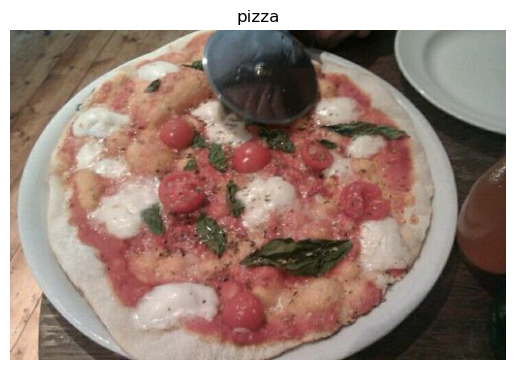

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="data/pizza_steak/train/",
                        target_class="pizza")

In [10]:
224, 224, 3

(224, 224, 3)

In [11]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

2024-05-28 06:31:32.597564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 06:31:38.325502: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(341, 512, 3), dtype=uint8, numpy=
array([[[ 78,  76,  64],
        [ 86,  84,  72],
        [ 85,  83,  71],
        ...,
        [140, 146, 144],
        [138, 147, 144],
        [139, 148, 145]],

       [[ 89,  87,  75],
        [ 96,  94,  82],
        [ 93,  91,  79],
        ...,
        [142, 148, 146],
        [140, 149, 146],
        [140, 149, 146]],

       [[ 96,  96,  84],
        [105, 103,  91],
        [101,  99,  87],
        ...,
        [144, 150, 148],
        [142, 151, 148],
        [142, 151, 148]],

       ...,

       [[214, 175, 146],
        [217, 177, 151],
        [218, 178, 152],
        ...,
        [ 10,  21,  13],
        [  9,  20,  12],
        [  9,  20,  12]],

       [[216, 177, 148],
        [217, 177, 151],
        [216, 176, 150],
        ...,
        [ 10,  21,  13],
        [  9,  20,  12],
        [  9,  20,  12]],

       [[221, 182, 153],
        [219, 179, 153],
        [216, 176, 150],
        ...,
        [ 11,  22,  1

In [12]:
# View the image shape
img.shape # returns width, height, colour channels

(341, 512, 3)

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [13]:
# Get all the pixel values between 0 & 1 (scale/normalize the data, as neural networks love values between 0 & 1)
img/255.

array([[[0.30588235, 0.29803922, 0.25098039],
        [0.3372549 , 0.32941176, 0.28235294],
        [0.33333333, 0.3254902 , 0.27843137],
        ...,
        [0.54901961, 0.57254902, 0.56470588],
        [0.54117647, 0.57647059, 0.56470588],
        [0.54509804, 0.58039216, 0.56862745]],

       [[0.34901961, 0.34117647, 0.29411765],
        [0.37647059, 0.36862745, 0.32156863],
        [0.36470588, 0.35686275, 0.30980392],
        ...,
        [0.55686275, 0.58039216, 0.57254902],
        [0.54901961, 0.58431373, 0.57254902],
        [0.54901961, 0.58431373, 0.57254902]],

       [[0.37647059, 0.37647059, 0.32941176],
        [0.41176471, 0.40392157, 0.35686275],
        [0.39607843, 0.38823529, 0.34117647],
        ...,
        [0.56470588, 0.58823529, 0.58039216],
        [0.55686275, 0.59215686, 0.58039216],
        [0.55686275, 0.59215686, 0.58039216]],

       ...,

       [[0.83921569, 0.68627451, 0.57254902],
        [0.85098039, 0.69411765, 0.59215686],
        [0.85490196, 0

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "data/pizza_steak/train"
test_dir = "data/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                        #  input_shape=(224, 224, 3)
                         ),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 36s 749ms/step - loss: 0.5771 - accuracy: 0.7007 - val_loss: 0.4130 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 36s 761ms/step - loss: 0.4451 - accuracy: 0.7940 - val_loss: 0.3922 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 37s 780ms/step - loss: 0.4183 - accuracy: 0.8220 - val_loss: 0.3495 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 34s 716ms/step - loss: 0.3751 - accuracy: 0.8387 - val_loss: 0.4112 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 34s 715ms/step - loss: 0.3410 - accuracy: 0.8687 - val_loss: 0.3249 - val_accuracy: 0.8680


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells above).

Looks like our model performed well enough to beat the accuracy of the original Food101 dataset paper: https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf 

(however, our results are of course not fully comparable, their model got 50.76% accuracy across 101 classes, our model achieved ~88% accuracy on 2 classses)

In [ ]:
# Epoch 1/5
# 47/47 [==============================] - 91s 2s/step - loss: 0.6346 - accuracy: 0.6105 - val_loss: 0.3862 - val_accuracy: 0.8180

In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

🛠 **Practice/exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](http://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.52527&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). 

In [16]:
train_data

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                         
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 164ms/step - loss: 0.7770 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 159ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 158ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 158ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 158ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [19]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 5.3287 - accuracy: 0.6273 - val_loss: 0.7317 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.8769 - accuracy: 0.6873 - val_loss: 0.5390 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.5338 - accuracy: 0.7547 - val_loss: 0.5091 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6288 - accuracy: 0.7293 - val_loss: 0.4884 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4540 - accuracy: 0.7947 - val_loss: 0.4246 - val_accuracy: 0.8100


In [20]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
15000000/31000

483.8709677419355

> 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

In [22]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2238802.jpg']
Image shape: (512, 512, 3)
['3401720.jpg']


Image shape: (512, 512, 3)


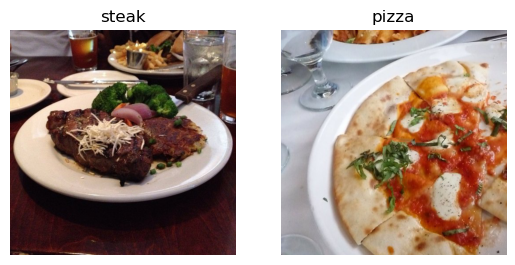

In [23]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("data/pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("data/pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [24]:
# Define directory dataset paths
train_dir = "data/pizza_steak/train/"
test_dir = "data/pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?s=20 

In [25]:
# Create train and test data generators and rescale the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directoy of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there?
len(train_data)

47

In [29]:
1500/32

46.875

In [30]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [31]:
images[7].shape

(224, 224, 3)

In [32]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [33]:
# Make the creating of our model a little easier
from tensorflow import keras
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

In [34]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=(3, 3), # the size of the sliding window going across an input
         strides=(1, 1), # the size of the step the sliding window takes across an input 
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)                 
])

🛠 **Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes: https://poloclub.github.io/cnn-explainer/

In [35]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [36]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [37]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [38]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 46s 977ms/step - loss: 3.1354 - accuracy: 0.6160 - val_loss: 0.6100 - val_accuracy: 0.6620
Epoch 2/5
47/47 [==============================] - 40s 850ms/step - loss: 0.4943 - accuracy: 0.7780 - val_loss: 0.3977 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 46s 973ms/step - loss: 0.3435 - accuracy: 0.8527 - val_loss: 0.3694 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 42s 889ms/step - loss: 0.2210 - accuracy: 0.9240 - val_loss: 0.4390 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 36s 763ms/step - loss: 0.1380 - accuracy: 0.9580 - val_loss: 0.4482 - val_accuracy: 0.7960


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

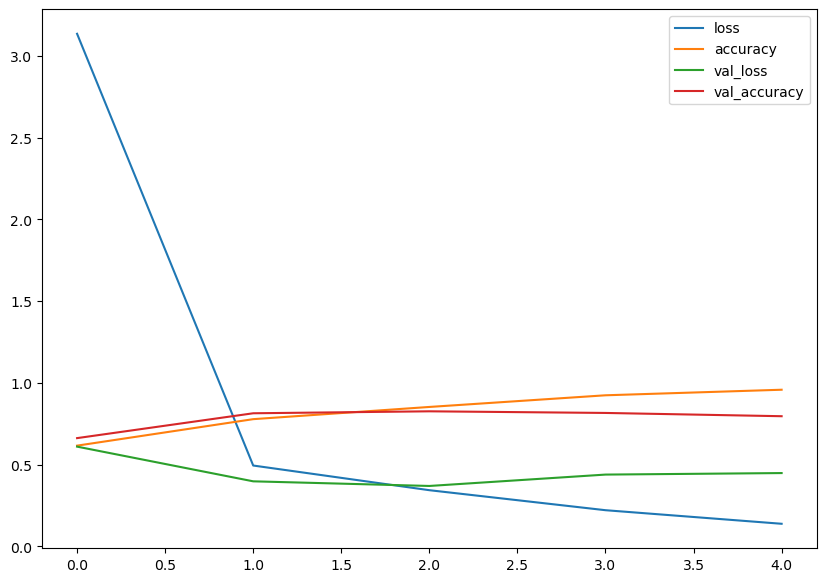

In [39]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [40]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

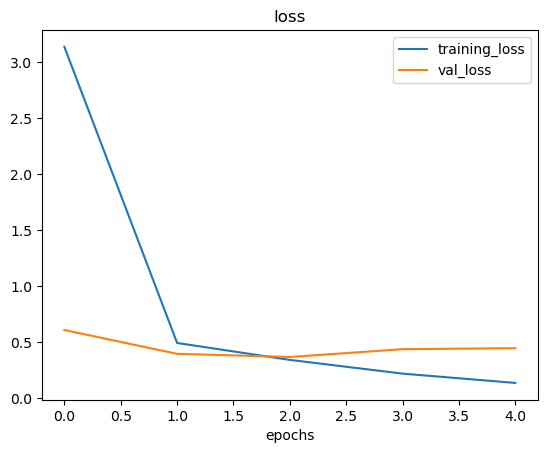

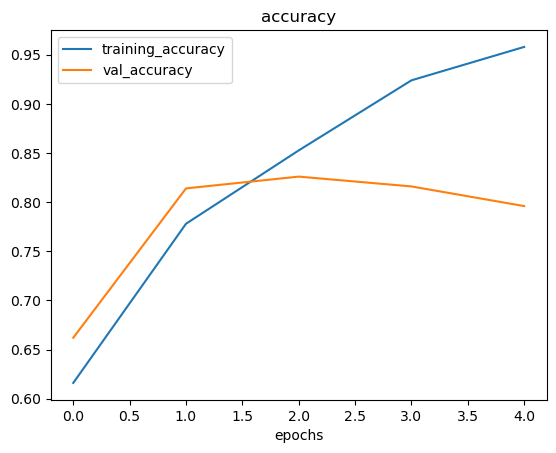

In [41]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> 🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**. 

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [42]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [43]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [44]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 17s 357ms/step - loss: 0.6164 - accuracy: 0.6687 - val_loss: 0.4449 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 17s 351ms/step - loss: 0.4543 - accuracy: 0.7947 - val_loss: 0.4229 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 17s 356ms/step - loss: 0.4230 - accuracy: 0.8060 - val_loss: 0.3520 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 17s 352ms/step - loss: 0.4007 - accuracy: 0.8260 - val_loss: 0.3492 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 18s 388ms/step - loss: 0.3873 - accuracy: 0.8393 - val_loss: 0.3323 - val_accuracy: 0.8640


In [45]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

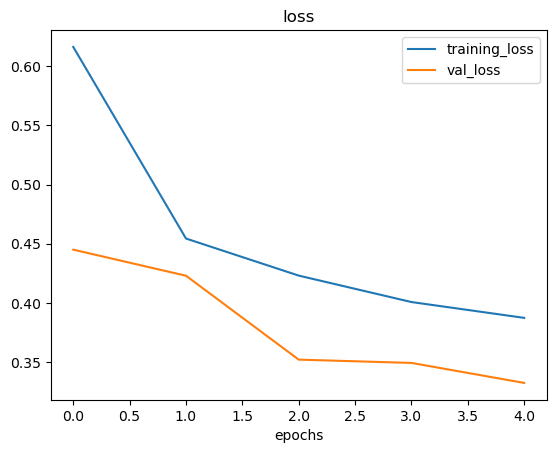

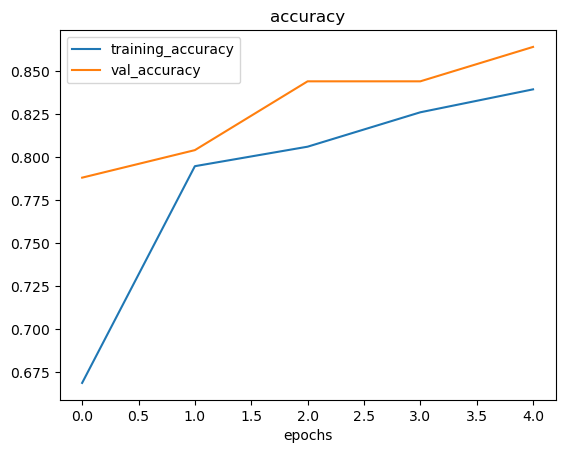

In [46]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [47]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip and image? 

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjuting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [48]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [49]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showing image number: 21


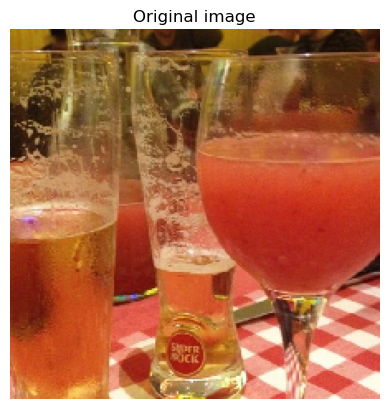

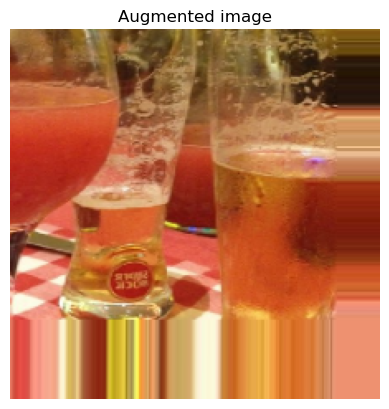

In [53]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [54]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 32s 668ms/step - loss: 0.7381 - accuracy: 0.5107 - val_loss: 0.6796 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 31s 648ms/step - loss: 0.6926 - accuracy: 0.4980 - val_loss: 0.6825 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 33s 697ms/step - loss: 0.6788 - accuracy: 0.5480 - val_loss: 0.6405 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 31s 659ms/step - loss: 0.6813 - accuracy: 0.5753 - val_loss: 0.6352 - val_accuracy: 0.6820
Epoch 5/5
47/47 [==============================] - 31s 657ms/step - loss: 0.6182 - accuracy: 0.6953 - val_loss: 0.5680 - val_accuracy: 0.6760


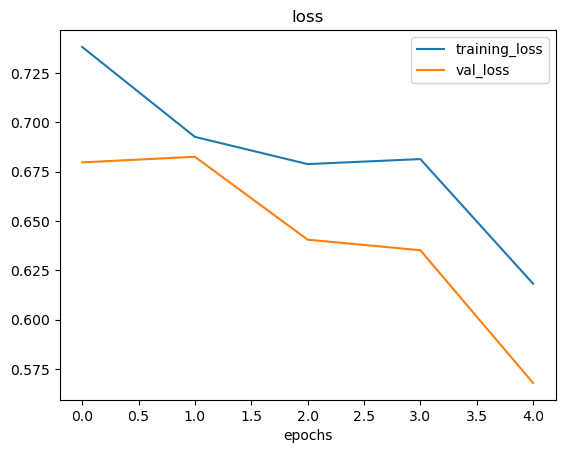

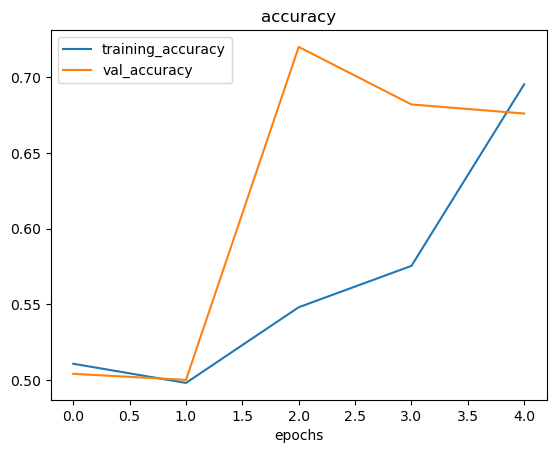

In [55]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [56]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [57]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(), 
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 32s 665ms/step - loss: 0.6359 - accuracy: 0.6473 - val_loss: 0.5826 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 32s 670ms/step - loss: 0.5538 - accuracy: 0.7347 - val_loss: 0.3954 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 33s 692ms/step - loss: 0.5027 - accuracy: 0.7647 - val_loss: 0.3948 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 34s 716ms/step - loss: 0.4980 - accuracy: 0.7653 - val_loss: 0.3990 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 31s 664ms/step - loss: 0.4804 - accuracy: 0.7847 - val_loss: 0.3532 - val_accuracy: 0.8520


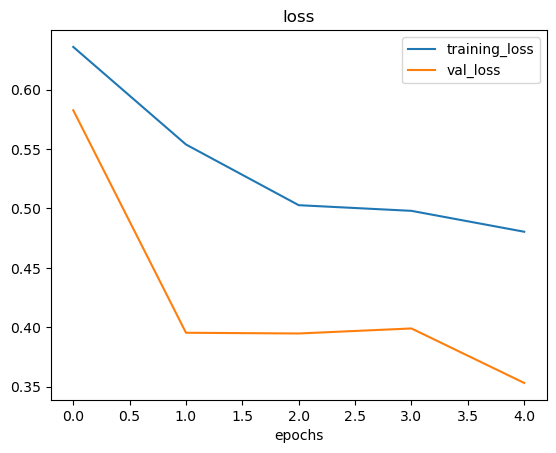

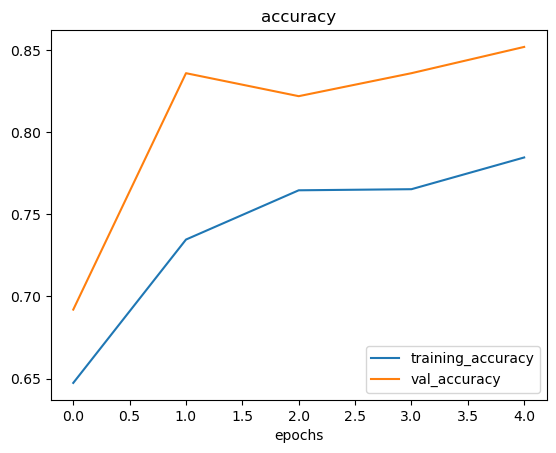

In [58]:
# Plot loss curves
plot_loss_curves(history_7)

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate 
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [59]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


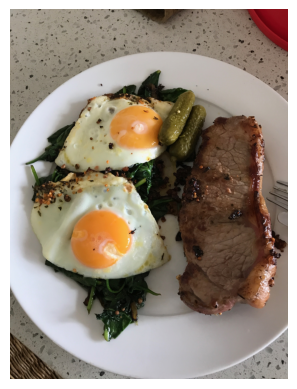

In [88]:
# View our example image
import urllib.request
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

# View the example image
url = urllib.request.urlopen("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg")
img = Image.open(url)

# Turn image into array
steak = np.array(img)
plt.imshow(steak)
plt.axis(False);

# Save Image
img.save("data/03-steak.jpeg")


In [86]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [87]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [89]:
# Load in and preprocess our custom image
steak = load_and_prep_image("data/03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6372549 , 0.6215686 , 0.5862745 ],
        [0.65686274, 0.627451  , 0.5892157 ],
        [0.6254902 , 0.5980392 , 0.5588235 ],
        ...,
        [0.5269608 , 0.05637255, 0.09558824],
        [0.5117647 , 0.04117647, 0.08039216],
        [0.5328431 , 0.07401961, 0.10539216]],

       [[0.6637255 , 0.6480392 , 0.6127451 ],
        [0.6392157 , 0.62352943, 0.5803922 ],
        [0.65539217, 0.63186276, 0.58480394],
        ...,
        [0.5357843 , 0.06911765, 0.08480392],
        [0.527451  , 0.05686275, 0.09607843],
        [0.52254903, 0.05196078, 0.09117647]],

       [[0.6544118 , 0.6426471 , 0.5838235 ],
        [0.64460784, 0.6132353 , 0.57009804],
        [0.65833336, 0.6230392 , 0.5877451 ],
        ...,
        [0.5367647 , 0.06617647, 0.10147059],
        [0.53333336, 0.0627451 , 0.10196079],
        [0.52794117, 0.05735294, 0.09264706]],

       ...,

       [[0.48872548, 0.42303923, 0.30588236],
        [0.05

In [90]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 124ms/step


array([[0.89639556]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [91]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [92]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [93]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 25ms/step


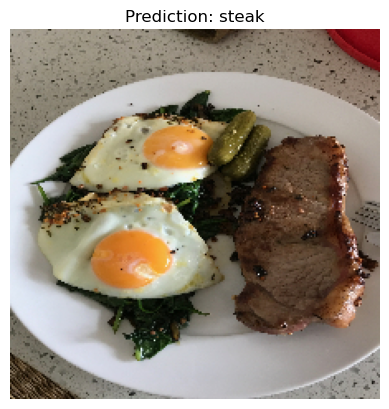

In [94]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza 🍕

1/1 [==============================] - 0s 28ms/step


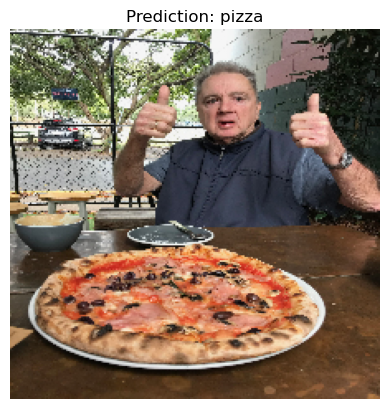

In [96]:
# Download another test custom image and make a prediction on it
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

# View the example image
url = urllib.request.urlopen("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg")
img = Image.open(url)
img.save("data/03-pizza-dad.jpeg")

# Plot prediction on custom image
pred_and_plot(model_7, "data/03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differet hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [99]:
import zipfile
from io import BytesIO

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Download zipfile
resp = urllib.request.urlopen("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip")
file = BytesIO(resp.read())

# Unzip our data
zip_ref = zipfile.ZipFile(file, "r")
zip_ref.extractall("data")
zip_ref.close()

In [106]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("data/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/10_food_classes_all_data'.
There are 10 directories and 0 images in 'data/10_food_classes_all_data/test'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in 'data/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in

In [101]:
# Setup the train and test directories
train_dir = "data/10_food_classes_all_data/train/"
test_dir = "data/10_food_classes_all_data/test/"

In [102]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['37384.jpg']
Image shape: (512, 384, 3)


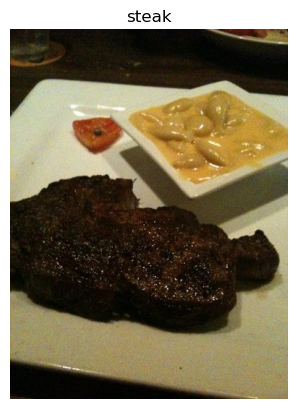

In [111]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [112]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)... how about we just take their model (also on 10 classes) and use it for our problem...?

In [113]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model

In [114]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 179s 759ms/step - loss: 2.1834 - accuracy: 0.1941 - val_loss: 2.0353 - val_accuracy: 0.2560
Epoch 2/5
235/235 [==============================] - 190s 807ms/step - loss: 1.9142 - accuracy: 0.3287 - val_loss: 1.9030 - val_accuracy: 0.3268
Epoch 3/5
235/235 [==============================] - 190s 808ms/step - loss: 1.5559 - accuracy: 0.4731 - val_loss: 1.9942 - val_accuracy: 0.3140
Epoch 4/5
235/235 [==============================] - 189s 805ms/step - loss: 1.0224 - accuracy: 0.6608 - val_loss: 2.3605 - val_accuracy: 0.2976
Epoch 5/5
235/235 [==============================] - 199s 845ms/step - loss: 0.4814 - accuracy: 0.8553 - val_loss: 3.4670 - val_accuracy: 0.2364


### 5. Evaulate the model

In [115]:
# Evalaute on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 18s 230ms/step - loss: 3.4670 - accuracy: 0.2364


[3.467026948928833, 0.23639999330043793]

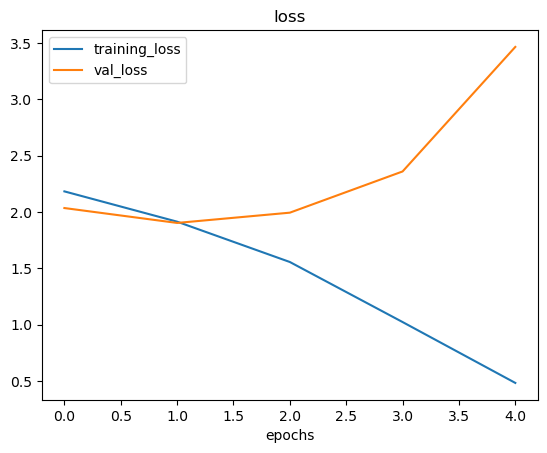

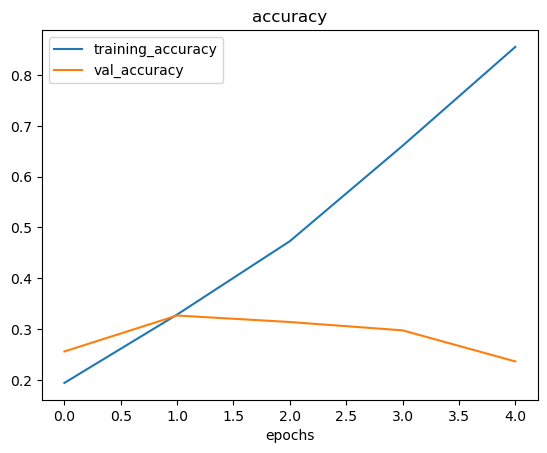

In [116]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training daa but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simpliy the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentaiton manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset 

In [ ]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 181ms/step - loss: 2.5804 - accuracy: 0.1518 - val_loss: 2.1288 - val_accuracy: 0.2416
Epoch 2/5
235/235 [==============================] - 42s 181ms/step - loss: 1.9763 - accuracy: 0.3076 - val_loss: 2.0062 - val_accuracy: 0.2880
Epoch 3/5
235/235 [==============================] - 43s 182ms/step - loss: 1.6241 - accuracy: 0.4616 - val_loss: 2.0412 - val_accuracy: 0.2816
Epoch 4/5
235/235 [==============================] - 43s 182ms/step - loss: 1.1375 - accuracy: 0.6440 - val_loss: 2.2407 - val_accuracy: 0.2788
Epoch 5/5
235/235 [==============================] - 43s 183ms/step - loss: 0.7465 - accuracy: 0.7781 - val_loss: 2.6548 - val_accuracy: 0.2564


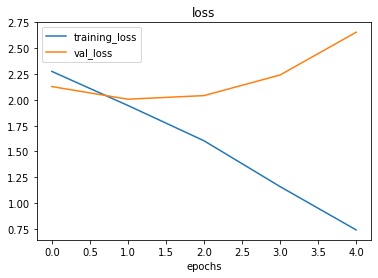

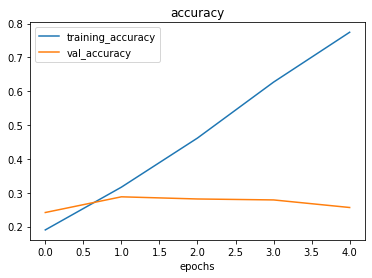

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 10)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 53, 53, 10)       

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data... 

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [117]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [125]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [119]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 223s 943ms/step - loss: 2.1948 - accuracy: 0.1825 - val_loss: 2.0644 - val_accuracy: 0.2492
Epoch 2/5
235/235 [==============================] - 236s 1s/step - loss: 2.0988 - accuracy: 0.2431 - val_loss: 2.0041 - val_accuracy: 0.2848
Epoch 3/5
235/235 [==============================] - 206s 873ms/step - loss: 2.0630 - accuracy: 0.2609 - val_loss: 1.8938 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 191s 813ms/step - loss: 2.0150 - accuracy: 0.2952 - val_loss: 1.8379 - val_accuracy: 0.3796
Epoch 5/5
235/235 [==============================] - 224s 950ms/step - loss: 1.9583 - accuracy: 0.3247 - val_loss: 1.7647 - val_accuracy: 0.4028


In [ ]:
# Baseline results
model_8.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 2.6155 - accuracy: 0.3000


[2.615480422973633, 0.30000001192092896]

In [ ]:
# Same model as baseline but with data augmentation turned on results
model_10.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 1.7698 - accuracy: 0.3908


[1.7698478698730469, 0.39079999923706055]

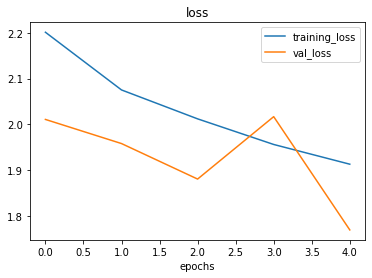

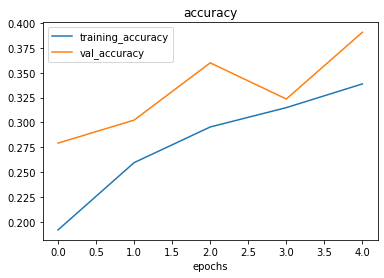

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiemtns, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [124]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [120]:
# Download some custom images
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

In [121]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [122]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 92ms/step


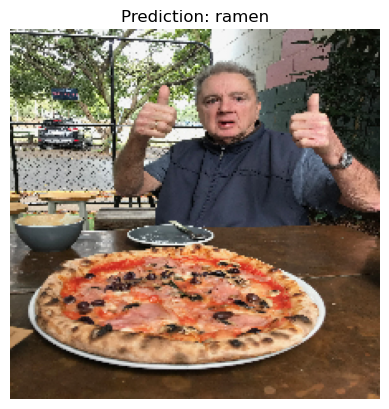

In [127]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="data/03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 27ms/step


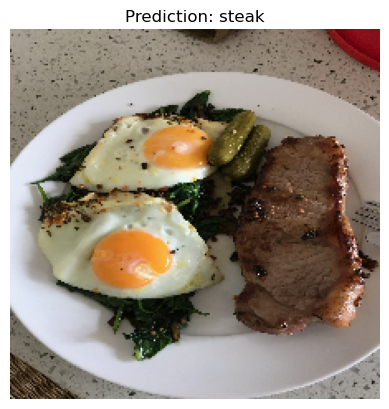

In [130]:
pred_and_plot(model=model_10,
              filename="data/03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 27ms/step


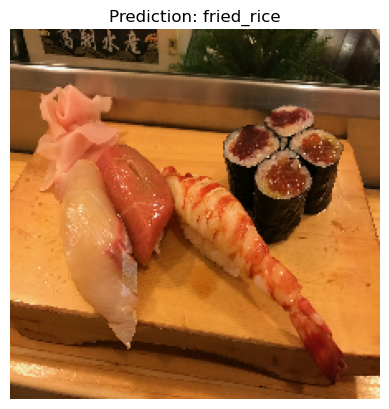

In [131]:
pred_and_plot(model=model_10,
              filename="data/03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 39ms/step


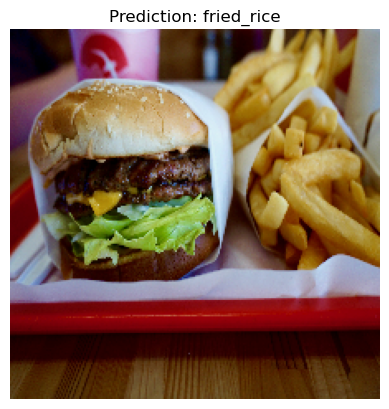

In [132]:
pred_and_plot(model=model_10,
              filename="data/03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

1/1 [==============================] - 0s 110ms/step


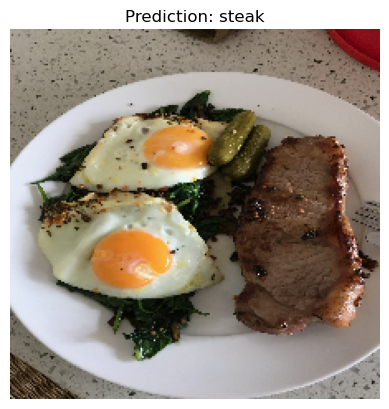

In [134]:
# Good news: our updated pred_and_plot function works for binary classification too...
pred_and_plot(model=model_3, # trained on pizza vs. steak
              filename="data/03-steak.jpeg",
              class_names=["pizza", "steak"])

## Saving and loading our model

In [137]:
# Save a model
model_10.save("exports/saved_trained_model_10")

In [138]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("exports/saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 19s 234ms/step - loss: 2.3040 - accuracy: 0.1020


[2.3040387630462646, 0.10199999809265137]

In [139]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 19s 238ms/step - loss: 2.3040 - accuracy: 0.1020


[2.3040385246276855, 0.10199999809265137]